In [72]:
from utils import collect, IMG_TAG, IMGC_TAG, IMGR_TAG

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

comb_path = "/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/combined"
prune_path = "/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/pruning"
base_path = "/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/basemodels"

sns.set_context("talk", font_scale=0.9)

In [54]:
df = collect(comb_path, prune_path)

In [55]:
df_base = collect(base_path)
df_base

,Amda,Augmix,DeepAugment,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Loss,Network,Path
270,False,False,False,0.1128,0.534523,0.689731,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...
90,True,True,True,0.1310,0.297981,0.558458,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...
90,True,True,True,0.1278,0.281395,0.535049,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...
270,False,False,False,0.1190,0.506832,0.689537,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...


In [56]:
# Find rows.
df = collect(comb_path, prune_path)
df["Teacher"] = df["Teacher"].fillna("no teacher")
df = df[df["Network"] == "resnet18"]
df = df[df[IMG_TAG] < 0.95]

In [57]:
# Add 0 points
other = ["Amda", "Augmix", "DeepAugment", "Loss", "Prune Method", "Teacher"]
rows = []
for _, group in df.groupby(by=other):
    row = group.iloc[-1].copy()
    amda = row["Amda"].item()
    unpruned_values = df_base.query(f"Amda == {amda} & Network == 'resnet18'")
    for tag in [IMG_TAG, IMGC_TAG, IMGR_TAG]:
        row[tag] = unpruned_values[tag].item()
    row["Prune Amount"] = 0.
    rows.append(row)
df = df.append(rows)

In [92]:
df_kd = df.query("Loss == 'KnowledgeDistill' | Loss == 'StandardLoss'")
df_at = df.query("Loss == 'AttentionDistill' | Loss == 'StandardLoss'")
df_kd = df_kd.sort_values(by=["Teacher", "Prune Method"])
df_at = df_at.sort_values(by=["Teacher", "Prune Method"])

In [93]:
# df_kd = df_kd.query("Teacher == 'amda_resnet50' | Teacher == 'no teacher'")
df_kd = df_kd.query("Amda == True & Network == 'resnet18'")

In [94]:
tags = [IMG_TAG, IMGC_TAG, IMGR_TAG]
non_tags = set(df_kd.columns) - set(tags)
df_kd = df_kd.melt(id_vars=non_tags, value_vars=tags, var_name="Error Type", value_name="Error")

In [49]:
sns.catplot(x="Prune Amount", y="Error", col="Error Type", hue="Prune Method", data=df_kd, kind="bar")

ValueError: Could not interpret input 'Error'

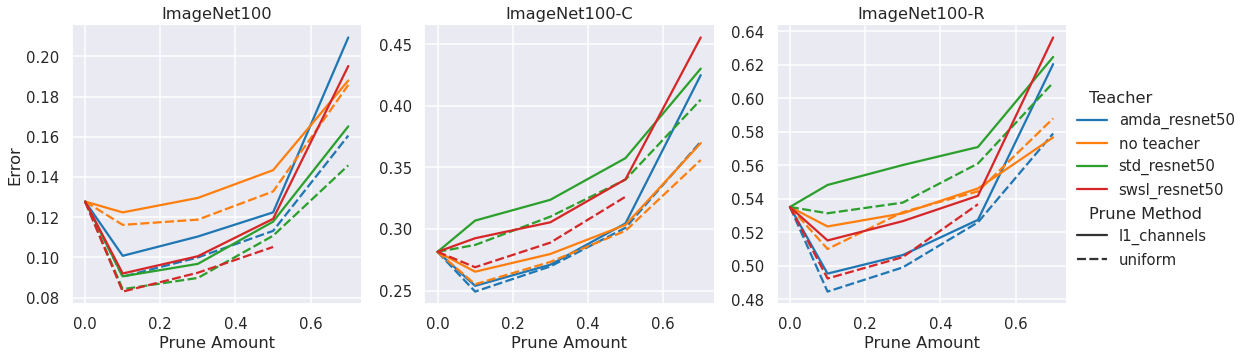

In [95]:
sns.set_style("darkgrid")
f = sns.relplot(data=df_kd, x="Prune Amount", y="Error", hue="Teacher", style="Prune Method", col="Error Type", kind="line", facet_kws={'sharey': False, 'sharex': True})
for ax, label in zip(f.axes[0], [IMG_TAG, IMGC_TAG, IMGR_TAG]):
    ax.set_title(label.split(" ")[0])

In [80]:
axis.axes

array([[<AxesSubplot:title={'center':'Error Type = ImageNet100 Error'}, xlabel='Prune Amount', ylabel='Error'>,
        <AxesSubplot:title={'center':'Error Type = ImageNet100-C Error'}, xlabel='Prune Amount'>,
        <AxesSubplot:title={'center':'Error Type = ImageNet100-R Error'}, xlabel='Prune Amount'>]],
      dtype=object)

In [75]:
f

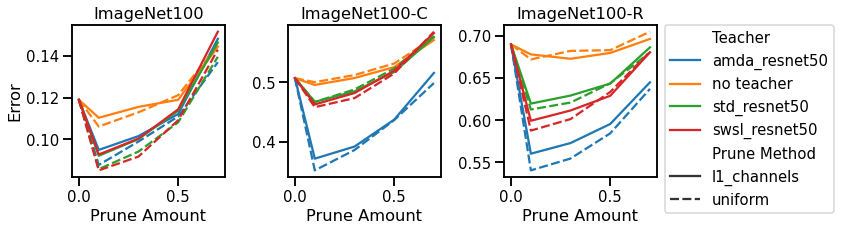

In [65]:
f, axes = plt.subplots(1, 3, figsize=(12, 3.5))
for err_tag, ax in zip([IMG_TAG, IMGC_TAG, IMGR_TAG], axes):
        # ax.hlines(df_base_[err_tag].item(), xmin=0.1, xmax=0.7, color="black", alpha=0.25)
        sns.lineplot(data=df_kd, x="Prune Amount", y=err_tag, ax=ax,  hue="Teacher", style="Prune Method")
        ax.get_legend().remove()
        ax.set_ylabel(None)
        ax.set_title(err_tag.split(" ")[0])

axes[0].set_ylabel("Error")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.tight_layout()

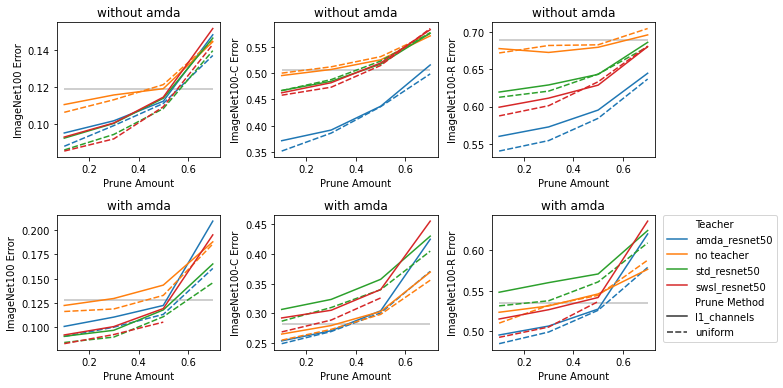

In [21]:
f, axes = plt.subplots(2, 3, figsize=(11, 5.5))

for amda, row in zip([False, True], axes):
    df_ = df_kd.query(f"Amda == {amda}")
    df_base_ = df_base.query(f"Amda == {amda} & Network == 'resnet18'")
    for err_tag, ax in zip([IMG_TAG, IMGC_TAG, IMGR_TAG], row):
        ax.hlines(df_base_[err_tag].item(), xmin=0.1, xmax=0.7, color="black", alpha=0.25)
        sns.lineplot(data=df_, x="Prune Amount", y=err_tag, ax=ax,  hue="Teacher", style="Prune Method")
        ax.get_legend().remove()
        if amda:
            ax.set_title("with amda")
        else:
            ax.set_title("without amda")
        # ax.set(aspect='equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.tight_layout()

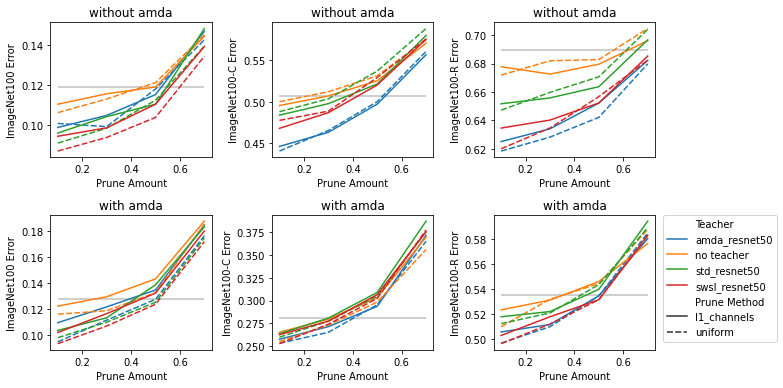

In [22]:
f, axes = plt.subplots(2, 3, figsize=(11, 5.5))

for amda, row in zip([False, True], axes):
    df_ = df_at.query(f"Amda == {amda}")
    df_base_ = df_base.query(f"Amda == {amda} & Network == 'resnet18'")
    for err_tag, ax in zip([IMG_TAG, IMGC_TAG, IMGR_TAG], row):
        ax.hlines(df_base_[err_tag].item(), xmin=0.1, xmax=0.7, color="black", alpha=0.25)
        sns.lineplot(data=df_, x="Prune Amount", y=err_tag, ax=ax,  hue="Teacher", style="Prune Method")
        ax.get_legend().remove()
        if amda:
            ax.set_title("with amda")
        else:
            ax.set_title("without amda")
        # ax.set(aspect='equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.tight_layout()

<AxesSubplot:xlabel='Prune Amount', ylabel='ImageNet100-C Error'>

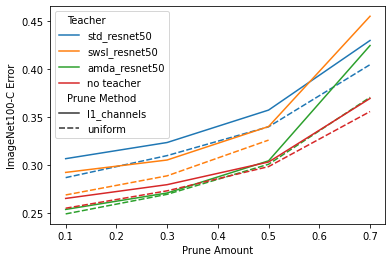

In [36]:
sns.lineplot(data=df, x="Prune Amount", y=IMGC_TAG, hue="Teacher", style="Prune Method")

In [7]:
df = collect(prune_path)
df_non = df[df["Amda"] == False]

In [8]:
df

,Amda,Augmix,DeepAugment,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Loss,Network,Path,Prune Amount,Prune Method
0,False,False,False,0.1062,0.500093,0.671883,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.1,uniform
0,False,False,False,0.1130,0.512072,0.681906,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.3,uniform
0,False,False,False,0.1450,0.575131,0.704604,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.7,uniform
0,False,False,False,0.1212,0.531429,0.682812,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.5,uniform
180,True,True,True,0.1162,0.255072,0.509959,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.1,uniform
180,True,True,True,0.1858,0.355947,0.587882,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.7,uniform
180,True,True,True,0.1328,0.298475,0.544361,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.5,uniform
180,True,True,True,0.1188,0.273216,0.531945,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.3,uniform
180,True,True,True,0.1258,0.292331,0.548047,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.1,uniform
180,True,True,True,0.1484,0.322845,0.577147,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0.3,uniform


In [12]:
df.iloc[1]["Path"]

'/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/pruning/uniform_std/0/evaluation'